## CPMSC 448 Homework 2
### Problem 4

#### Name: Hongshuo Wang
#### PSU id: 949638168


In this problem will use the Pima Indians Diabetes dataset from the UCI repository to experiment with the $k$-NN algorithm and find the optimal value for the number of neighbors  $k$. You do not need to implement the algorithm and encouraged to use the implementation in \texttt{scikit-learn}.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### a) 
Download the provided `Pima.csv` data file and load it using `pandas`. As a sanity check, make sure  there are 768 rows of data (potential diabetes patients) and 9 columns (8 input features including  `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`, and 1 target output). Note that the data file has no header and you might want to explicitly create the header. The last value in each row contains the target label for that row, and the remaining values are the features. Report the statics of each feature (min, max, average) and the histogram of the labels (target outputs).
    

In [2]:

pima_headers = ["Pregnancies", "Glucose", "BloodPressure",
             "SkinThickness", "Insulin", "BMI",
             "DiabetesPedigreeFunction", "Age","Outcome"]

pima_data = pd.read_csv('Pima.csv',names=pima_headers)
print(f'data_size: {pima_data.shape}')
pima_data.head()


data_size: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
pima_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#Checking the null values
pima_data.isnull().values.any()

False

In [6]:
grouped_data = pima_data.groupby('Outcome')
grouped_data.size()

Outcome
0    500
1    268
dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

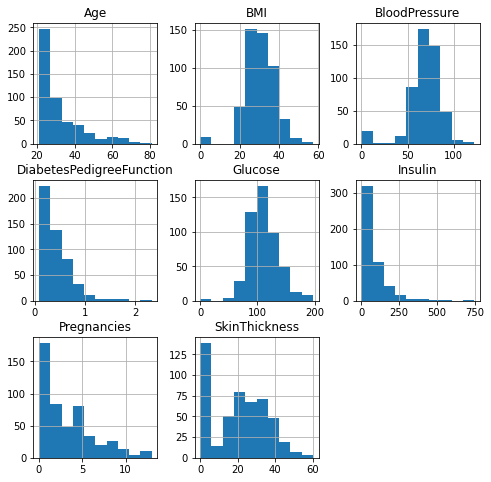

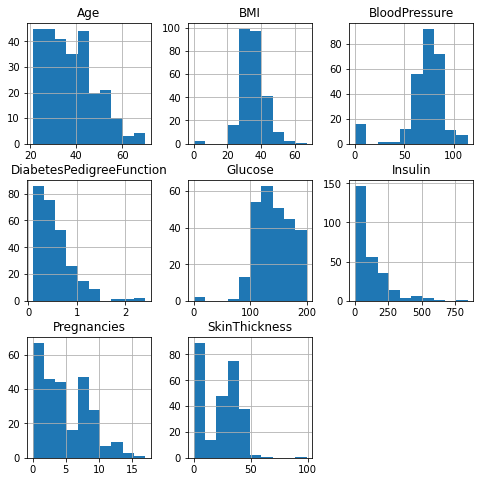

In [7]:
grouped_data.hist(figsize=(8,8))

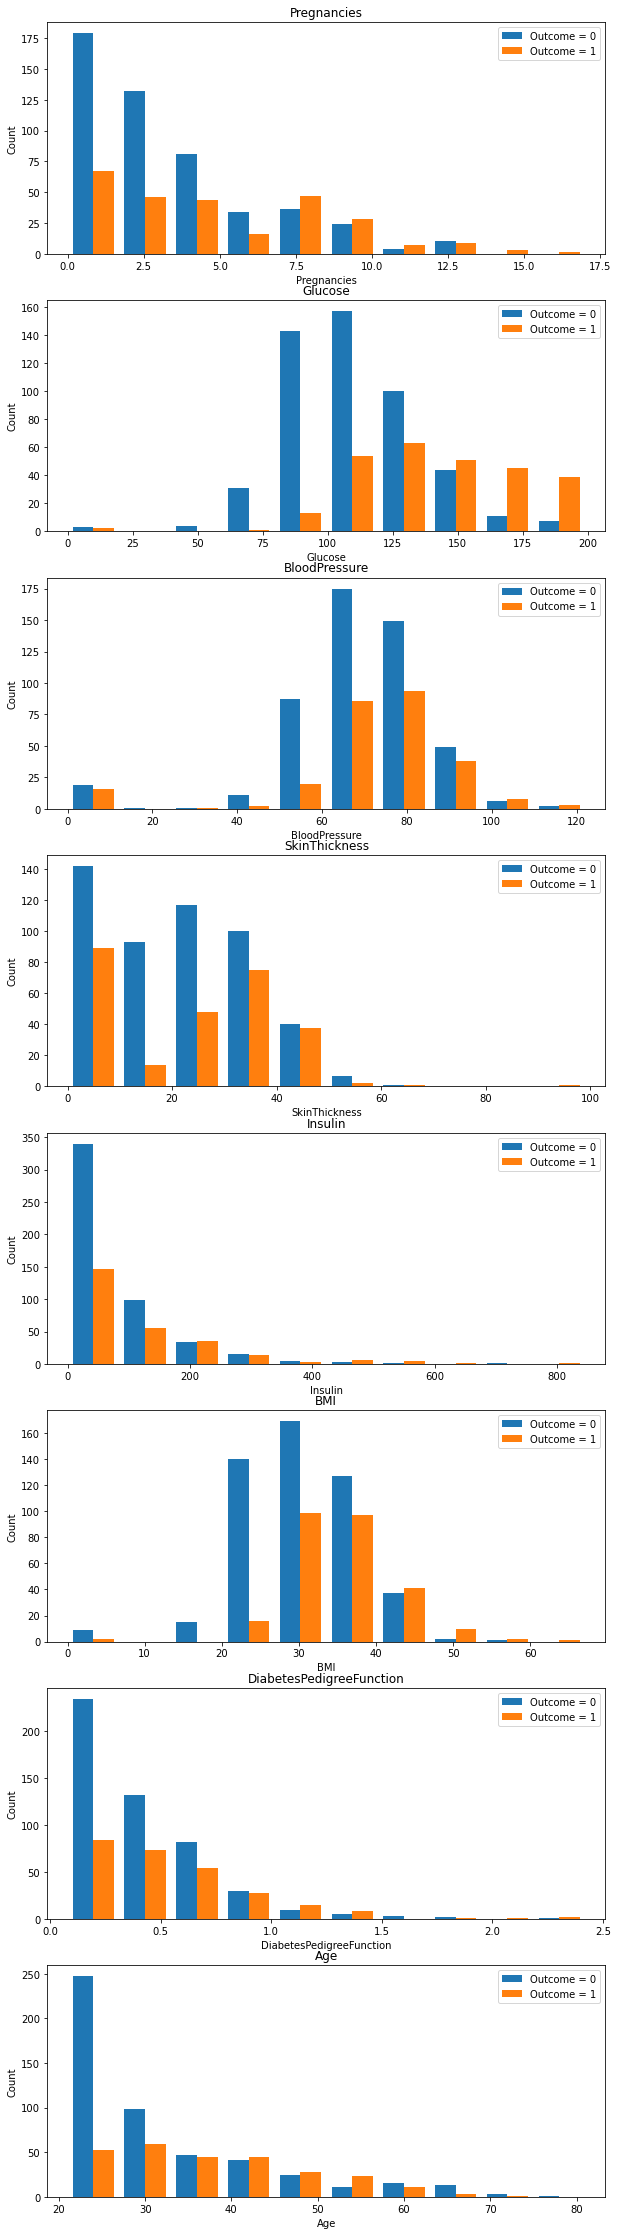

In [8]:

fig, ax1 = plt.subplots(8,1,figsize=(10,40))

for i in range(8):
    var = pima_headers[i]
   
    ax1[i].set_title(var)
    ax1[i].set_xlabel(pima_headers[i])
    ax1[i].set_ylabel("Count")
    
    ax1[i].hist([pima_data[var][pima_data.Outcome==0],
                pima_data[var][pima_data.Outcome==1]],
             label=["Outcome = 0", "Outcome = 1"])

    ax1[i].legend()
    

### b) 
Split the data into training and test data with 80\% training and 20\% test data sizes. 

Use 5-fold cross-validation on training data to decide the best number of neighbours $k$. To this end, you can use the built in functionality in  `scikit-learn` such as `cross_val_score`. For $k=1,2,3,\ldots, 15$ compute the 5-fold cross validation error and plot the results  (with values of $k$ on the $x$-axis and accuracy on the $y$-axis). Include the plot in your report and justify your decision for picking a particular number of neighbors $k$.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 


X_features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI",
             "DiabetesPedigreeFunction", "Age"]

X = pima_data[X_features].copy()
y = pima_data['Outcome'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

test_s = []
train_s = []

for i in range(1,16):

    knn = KNeighborsClassifier(i)
    tr_s = cross_val_score(knn, X_train, y_train,cv=5)
    t_s = cross_val_score(knn,X_test, y_test,cv=5)
    
    train_s.append(tr_s.mean())
    test_s.append(t_s.mean())

print(test_s)
print(train_s)
print(len(test_s))

[0.6617204301075269, 0.6950537634408602, 0.6754838709677419, 0.7144086021505377, 0.7270967741935485, 0.7268817204301075, 0.7141935483870967, 0.7206451612903224, 0.72752688172043, 0.7141935483870967, 0.7141935483870967, 0.6946236559139785, 0.7206451612903224, 0.7010752688172043, 0.7141935483870967]
[0.6889111022257763, 0.6889377582300413, 0.6970811675329868, 0.7117286418765827, 0.7133813141410101, 0.7199386911901906, 0.718286018925763, 0.7329201652672264, 0.7280154604824738, 0.7231640677062509, 0.7247900839664134, 0.7443422630947621, 0.7541250166600026, 0.7378381980541118, 0.7394508863121418]
15


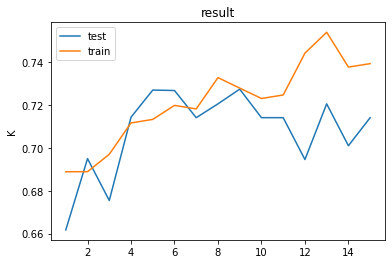

In [11]:
fig, axs = plt.subplots()
axs.set_title("result")
axs.set_ylabel("average accuracy")
axs.set_ylabel("K")

axs.plot(range(1,16),test_s,label="test")
axs.plot(range(1,16),train_s,label="train")
axs.legend()

In [12]:
train_min_id = train_s.index(max(train_s))
test_min_id = test_s.index(max(test_s))
print(f'Best K in training data: {train_min_id + 1} \t acc: {max(train_s)}')
print(f'Best K in test data: {test_min_id+1} \t acc: {max(test_s)}')

Best K in training data: 13 	 acc: 0.7541250166600026
Best K in test data: 9 	 acc: 0.72752688172043


### c ) 
Evaluate the $k$-NN algorithm on test data with the optimal number of neighbours you obtained in previous step and report the test error.

In [13]:
op_k = train_min_id + 1
print(f"optimal solution: k = {op_k}")
knn_opt = KNeighborsClassifier(op_k)
knn.fit(X_train,y_train)

print(f"Test Error: {100- 100*knn.score(X_test,y_test)} %")


optimal solution: k = 13
Test Error: 23.37662337662337 %


### d) 
Process the input data  by subtracting the mean (a.k.a. centralization) and dividing by the standard deviation (a.k.a. standardization) over each dimension (feature),  repeat the previous part and report the accuracy. Do centralization and standardization affect the accuracy? Why?

In [14]:
#reference: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_t = pima_data[X_features].copy()
y = pima_data['Outcome'].copy()
scaler_x = scaler.fit_transform(X)
scaler_x = pd.DataFrame(scaler_x, columns=X_features)
scaler_x.head()





,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [15]:
X_train, X_test, y_train, y_test = train_test_split(scaler_x, y, test_size=0.2)

In [16]:
test_s = []
train_s = []

for i in range(1,16):

    knn = KNeighborsClassifier(i)
    tr_s = cross_val_score(knn, X_train, y_train,cv=5)
    t_s = cross_val_score(knn,X_test, y_test,cv=5)
    
    train_s.append(tr_s.mean())
    test_s.append(t_s.mean())

print(test_s)
print(train_s)
print(len(test_s))

[0.6688172043010752, 0.7468817204301075, 0.7855913978494623, 0.7793548387096774, 0.7855913978494623, 0.7858064516129032, 0.7793548387096774, 0.7724731182795699, 0.7660215053763441, 0.766236559139785, 0.7855913978494623, 0.7726881720430108, 0.7726881720430108, 0.7726881720430108, 0.7791397849462365]
[0.7018659202985471, 0.7051845928295348, 0.7296014927362389, 0.7296281487405037, 0.7214580834332933, 0.7149806743969078, 0.7166200186592031, 0.7117552978808476, 0.7296947887511662, 0.7134079701452752, 0.7215247234439558, 0.7264427562308409, 0.7263627882180461, 0.7247634279621484, 0.7410235905637744]
15


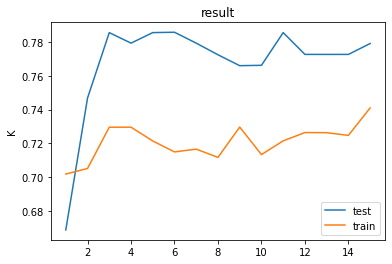

In [17]:
fig, axs = plt.subplots()
axs.set_title("result")
axs.set_ylabel("average accuracy")
axs.set_ylabel("K")

axs.plot(range(1,16),test_s,label="test")
axs.plot(range(1,16),train_s,label="train")
axs.legend()

In [18]:
train_min_id = train_s.index(max(train_s))
test_min_id = test_s.index(max(test_s))
print(f'Best K in training data: {train_min_id + 1} \t acc: {max(train_s)}')
print(f'Best K in test data: {test_min_id+1} \t acc: {max(test_s)}')

Best K in training data: 15 	 acc: 0.7410235905637744
Best K in test data: 6 	 acc: 0.7858064516129032


In [19]:
op_k = train_min_id + 1
print(f"optimal solution: k = {op_k}")
knn_opt = KNeighborsClassifier(op_k)
knn.fit(X_train,y_train)

print(f"Test Error: {100- 100*knn.score(X_test,y_test)} %")

optimal solution: k = 15
Test Error: 22.727272727272734 %


#### centralization and standardization do affect the accuracy since those scalering methods make training less sensitive to the scale of feature. Moreover, it also can help to compare features that have different units or scales. Standardizing also improve the behavior of training process since it ameliorate the numerical condition of the optimization problems.